In [1]:
##########################################################################################
#                                                                                        #
#  888888b.  8888888 .d88888b.   .d8888b.     .d8888b.   .d8888b.      d8888      d8888  #
#  888  "88b   888  d88P" "Y88b d88P  Y88b   d88P  Y88b d88P  Y88b    d8P888     d8P888  #
#  888  .88P   888  888     888 Y88b.        888        888          d8P 888    d8P 888  #
#  8888888K.   888  888     888  "Y888b.     888d888b.  888d888b.   d8P  888   d8P  888  #
#  888  "Y88b  888  888     888     "Y88b.   888P "Y88b 888P "Y88b d88   888  d88   888  #
#  888    888  888  888     888       "888   888    888 888    888 8888888888 8888888888 #
#  888   d88P  888  Y88b. .d88P Y88b  d88P   Y88b  d88P Y88b  d88P       888        888  #
#  8888888P" 8888888 "Y88888P"   "Y8888P"     "Y8888P"   "Y8888P"        888        888  #
#                                                                                        # 
##########################################################################################
#
# Wrangle CDC "Rare Diseases" data
#
##########################################################################################

In [2]:
##################################################################################################################
#
# YouDo:
#    1) Make a copy of this notebook with your name as a suffix:  
#       BIOS6644_XML_RareDiseases_FirstLast.ipynb
#    2) Do all work in this new notebook.
#    3) Submit completed work via GitHub pull request
#
##################################################################################################################


## Get Data data.gov

Data available at https://data.cdc.gov/api/views/45b4-9j7u/rows.xml



In [6]:
# Download with:
# Info: 
#     https://data.cdc.gov/NNDSS/NNDSS-Table-I-infrequently-reported-notifiable-dis/45b4-9j7u
#


! wget https://data.cdc.gov/api/views/45b4-9j7u/rows.xml
! mv rows.xml /home/dir0417/Desktop/BIOS6644-master/Data/rows.xml

--2019-11-16 19:04:46--  https://data.cdc.gov/api/views/45b4-9j7u/rows.xml
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving data.cdc.gov (data.cdc.gov)... 52.206.140.199, 52.206.140.205, 52.206.68.26
Connecting to data.cdc.gov (data.cdc.gov)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/xml]
Saving to: ‘rows.xml.2’

rows.xml.2              [       <=>          ]   2.26M  1.62MB/s    in 1.4s    

2019-11-16 19:04:48 (1.62 MB/s) - ‘rows.xml.2’ saved [2373297]



In [7]:
import numpy as np
import pandas as pd
import pylab as plt
%matplotlib notebook

#import xml.etree.ElementTree as ET
from lxml import etree as ET

In [8]:
# Adapted from:  https://python-forum.io/Thread-How-to-display-XML-tree-structure-with-Python

def xml_tree_vis(filename):
    import re, collections
    from lxml import etree as ET

    raw_tree = ET.parse(filename)
    xml_root = raw_tree.getroot()      # the top-most node
    nice_tree = collections.OrderedDict()

    for tag in xml_root.iter():
        path = re.sub('\[[0-9]+\]', '', raw_tree.getpath(tag))
        if path not in nice_tree:
            nice_tree[path] = []
        if len(tag.keys()) > 0:
            nice_tree[path].extend(attrib for attrib in tag.keys() if attrib not in nice_tree[path])            

    for path, attribs in nice_tree.items():
        indent = int(path.count('/') - 1)
        nodename = path.split('/')[-1]
        if len(attribs) > 0:
            attribslist =  ', '.join(attribs)  
        else:
            attribslist = '-'
            
        print('{0}{1}: {2} [{3}]'.format('    ' * indent, indent, nodename, attribslist))
        
# Visualize this file's structure
xml_tree_vis('/home/dir0417/Desktop/BIOS6644-master/Data/rows.xml')

0: response [-]
    1: row [-]
        2: row [_id, _uuid, _position, _address]
            3: disease [-]
            3: mmwr_year [-]
            3: mmwr_week [-]
            3: current_week_flag [-]
            3: cum_2017_flag [-]
            3: _5_year_weekly_average_flag [-]
            3: total_cases_reported_2016_flag [-]
            3: total_cases_reported_2015_flag [-]
            3: total_cases_reported_2014_flag [-]
            3: total_cases_reported_2013_flag [-]
            3: total_cases_reported_2012_flag [-]
            3: _5_year_weekly_average [-]
            3: total_cases_reported_2016 [-]
            3: total_cases_reported_2015 [-]
            3: total_cases_reported_2014 [-]
            3: total_cases_reported_2013 [-]
            3: total_cases_reported_2012 [-]
            3: current_week [-]
            3: cum_2017 [-]
            3: states_reporting_cases_during_current_week_no [-]


In [ ]:
# Notice there are two levels with the tag "row"  This sort of thing is common in 
# XML and really annoying.  
# This sort of display makes it stand out, though.
# We'll need to remember that for later.

In [11]:

#  Read the entire tree into a collection of "nodes"
#  each of which have several associated attributes,
#  possibly including other "child nodes"
#
#  Web browsers can display XML in a relatively
#  easy-to-read way.  Open rows.xml with your browser.

# Open the file in Python: 
tree = ET.parse('/home/dir0417/Desktop/BIOS6644-master/Data/rows.xml')
root = tree.getroot()      # the top-most node


In [12]:
# This data seems to be organized by an attribute called "row", each of 
#  which has several children (probably the columns)

In [13]:
# You can see root's child nodes with

for xx in root.iter():
    print(xx)

# This shows all of the children of root, without regard to their position in the tree.
# In this data set, though, we want to parse each row separately.


<Element response at 0x7f24c350d188>
<Element row at 0x7f24c350dec8>
<Element row at 0x7f24c350dd48>
<Element disease at 0x7f24c350dd08>
<Element mmwr_year at 0x7f24c350dec8>
<Element mmwr_week at 0x7f24c350dd48>
<Element current_week_flag at 0x7f24c350df48>
<Element cum_2017_flag at 0x7f24c350dd08>
<Element _5_year_weekly_average_flag at 0x7f24c350dd48>
<Element total_cases_reported_2016_flag at 0x7f24c350dec8>
<Element total_cases_reported_2015_flag at 0x7f24c350dd08>
<Element total_cases_reported_2014_flag at 0x7f24c350dd48>
<Element total_cases_reported_2013_flag at 0x7f24c350dec8>
<Element total_cases_reported_2012_flag at 0x7f24c350dd08>
<Element row at 0x7f24c350dd48>
<Element disease at 0x7f24c350dec8>
<Element mmwr_year at 0x7f24c350dd08>
<Element mmwr_week at 0x7f24c350dd48>
<Element current_week_flag at 0x7f24c350df48>
<Element cum_2017_flag at 0x7f24c350dec8>
<Element _5_year_weekly_average at 0x7f24c350dd48>
<Element total_cases_reported_2016 at 0x7f24c350dd08>
<Element to

In [ ]:
## Here's how you iterate through only the nodes called "row"
for xx in root.iter('row'):
    print(xx)


In [18]:
tags = [x for x in root.iter()]
#dir(tags[3])
#tags[3].text #gives you the text in the tag
#print(tags[2].attrib)
#_id = id, row-skhd = value
tags

[<Element response at 0x7f24c350d188>,
 <Element row at 0x7f24c35fd948>,
 <Element row at 0x7f24c35fde48>,
 <Element disease at 0x7f24c35fd708>,
 <Element mmwr_year at 0x7f24c35fd248>,
 <Element mmwr_week at 0x7f24c350dbc8>,
 <Element current_week_flag at 0x7f24c350dc88>,
 <Element cum_2017_flag at 0x7f24c350dcc8>,
 <Element _5_year_weekly_average_flag at 0x7f24c350dc48>,
 <Element total_cases_reported_2016_flag at 0x7f24c350d988>,
 <Element total_cases_reported_2015_flag at 0x7f24c350db48>,
 <Element total_cases_reported_2014_flag at 0x7f24c350db88>,
 <Element total_cases_reported_2013_flag at 0x7f24c34de988>,
 <Element total_cases_reported_2012_flag at 0x7f24c34de108>,
 <Element row at 0x7f24c34def48>,
 <Element disease at 0x7f24c34ded88>,
 <Element mmwr_year at 0x7f24c34de048>,
 <Element mmwr_week at 0x7f24c34debc8>,
 <Element current_week_flag at 0x7f24c34de148>,
 <Element cum_2017_flag at 0x7f24c34de0c8>,
 <Element _5_year_weekly_average at 0x7f24c34de488>,
 <Element total_cases_r

In [19]:
##################################################################################################################
#
# YouDo:
#
#   You'd like to generate a list of all the diseases on this list.  There are several ways to do this,
#   but unlike the "row" nodes, the data seems to consistently use the element name "disease".
#
#   1) Generate a list of all nodes called "disease" 
#
#######################################  BEGIN STUDENT CODE  #####################################################

# use root.iter from above but specify I only want to grab the "column" called disease
diseases = list(root.iter('disease'))

# nodes that I can get information from. Is this like having the location but not the info?
diseases

#######################################   END STUDENT CODE   #####################################################


[<Element disease at 0x7f24c35fd708>,
 <Element disease at 0x7f24c34ded88>,
 <Element disease at 0x7f24c34d6548>,
 <Element disease at 0x7f24c34d6a08>,
 <Element disease at 0x7f24c34d6d08>,
 <Element disease at 0x7f24c34d9048>,
 <Element disease at 0x7f24c34d9348>,
 <Element disease at 0x7f24c34d9648>,
 <Element disease at 0x7f24c34d9948>,
 <Element disease at 0x7f24c34d9c48>,
 <Element disease at 0x7f24c34d9f48>,
 <Element disease at 0x7f24c3583288>,
 <Element disease at 0x7f24c3583588>,
 <Element disease at 0x7f24c3583888>,
 <Element disease at 0x7f24c3583b88>,
 <Element disease at 0x7f24c3583e88>,
 <Element disease at 0x7f24c34931c8>,
 <Element disease at 0x7f24c34934c8>,
 <Element disease at 0x7f24c34937c8>,
 <Element disease at 0x7f24c3493ac8>,
 <Element disease at 0x7f24c3493e08>,
 <Element disease at 0x7f24c34bf188>,
 <Element disease at 0x7f24c34bf488>,
 <Element disease at 0x7f24c34bf788>,
 <Element disease at 0x7f24c34bfa88>,
 <Element disease at 0x7f24c34bfd88>,
 <Element di

In [20]:
# These nodes have various attributes which you can view like this:
dir(diseases[0])


['__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_init',
 'addnext',
 'addprevious',
 'append',
 'attrib',
 'base',
 'clear',
 'cssselect',
 'extend',
 'find',
 'findall',
 'findtext',
 'get',
 'getchildren',
 'getiterator',
 'getnext',
 'getparent',
 'getprevious',
 'getroottree',
 'index',
 'insert',
 'items',
 'iter',
 'iterancestors',
 'iterchildren',
 'iterdescendants',
 'iterfind',
 'itersiblings',
 'itertext',
 'keys',
 'makeelement',
 'nsmap',
 'prefix',
 'remove',
 'replace',
 'set',
 'sourceline',
 'tag',
 'tail',
 'text',
 'values',
 'xpath']

In [24]:
# One of the key attribtues is the "text" attribute which contains the
# disease names we're looking for.
# naturally thrives in soils, all over population
diseases[0].text
diseases[4].text

'Arboviral diseases¶,** La Crosse virus disease'

In [22]:


##################################################################################################################
#
# YouDo:
#
# 1) Loop through the list of nodes and extract the text attribute of each node into a list called diz
#    
#   Stretch goal:  do this with a list comprehension
#
# 2) Make a second list called udiz containing only the unique members of this data set 

#######################################  BEGIN STUDENT CODE  #####################################################

#1
# James' way:
diz = [xx.text for xx in diseases]
print(diz)
#pull out all the diseases
#2
udiz = list (set(diz))  #set is one way to get single "values"
udiz.sort()
udiz

#set comprehension (Andrew's code)
udiz = {xx.text for xx in diseases}
udiz
#######################################   END STUDENT CODE   #####################################################

['Anthrax',
 'Arboviral diseases¶,** Chikungunya virus disease',
 'Arboviral diseases¶,** Chikungunya virus††',
 'Arboviral diseases¶,** Eastern equine encephalitis virus ',
 'Arboviral diseases¶,** Eastern equine encephalitis virus disease',
 'Arboviral diseases¶,** Jamestown Canyon virus disease',
 'Arboviral diseases¶,** Jamestown Canyon virus§§ ',
 'Arboviral diseases¶,** La Crosse virus disease',
 'Arboviral diseases¶,** La Crosse virus§§ ',
 'Arboviral diseases¶,** Powassan virus ',
 'Arboviral diseases¶,** Powassan virus disease',
 'Arboviral diseases¶,** St. Louis encephalitis virus ',
 'Arboviral diseases¶,** St. Louis encephalitis virus disease',
 'Arboviral diseases¶,** Western equine encephalitis virus ',
 'Arboviral diseases¶,** Western equine encephalitis virus disease',
 'Botulism, foodborne',
 'Botulism, infant',
 'Botulism, other (wound and unspecified)',
 'Botulism, total',
 'Brucellosis',
 'Chancroid',
 'Cholera',
 'Cyclosporiasis**',
 'Diphtheria',
 'Haemophilus inf

In [28]:
# This data set uses a column called cum_2017 to report the cumulative number of reports of that disease
# in 2017
##################################################################################################################
#
# YouDo:
# Generate a list of the top 5 most reported of these diseases in 2017 and the number of reports of each
#
# Note: This is a pain without using Pandas.   Give it a go and see how far you get in 30 minutes.
#       After that, feel free to abandon it and use Pandas in the cell below.
#
#######################################  BEGIN STUDENT CODE  #####################################################
reports = dict()

for row in root.iter('disease'):
    parent = row.getparent()
    this_diz = parent.find('disease').text
    this_cum2017 = parent.find('cum_2017') # this is a "column" name within each row

    if this_cum2017 is None: # seems like they could've just said 0 and we wouldn't need to do this step
        this_count = 0
    else:
        this_count = int(this_cum2017.text) # are all integers automatically text in XML?
        
    #reports.append('{}:{}'.format(str(this_count).ljust(5), this_diz))
 
    if this_diz not in reports.keys(): # if we haven't already counted this disease, add it to the list
        reports[this_diz] = this_count
        
    elif this_count > reports[this_diz]: #if this count is greater than the last time we saw this disease, update it
        reports[this_diz] = this_count
    
def keys_with_max_n_vals(d,n=1):
    """ 
    a) create a list of the dict's keys and values; 
    b) return the key with the max value
    """  
    v=list(d.values()) # count of disease
    k=list(d.keys()) # list of disease names
    return [(xx, k[v.index(xx)]) for xx in sorted(v,reverse=True)[:n]] # sort by most abundant

keys_with_max_n_vals(reports,5) # print top 5 most seen diseases

#note to self look at Andrew's code

[(1091, 'Cyclosporiasis**'),
 (731, 'Listeriosis'),
 (589, 'Syphilis, congenital¶¶¶'),
 (444, 'Zika virus disease, non-congenital††††  '),
 (335, 'Typhoid fever (caused by Salmonella typhi)')]

In [31]:
##################################################################################################################
#
# YouDo:  If you abandoned hope above, try reading the reports dictionary into a data frame, try importing
# reports into a data frame and sorting it.

#######################################  BEGIN STUDENT CODE  #####################################################

#importing reports into df
df = pd.DataFrame([reports.keys(), reports.values()]).T
df.columns=['Disease','Counts']

#sorting values
df.sort_values('Counts',ascending=False,inplace=True)
df.iloc[:5,:]

#######################################   END STUDENT CODE   #####################################################

,Disease,Counts
15,Cyclosporiasis**,1091
28,Listeriosis,731
46,"Syphilis, congenital¶¶¶",589
63,"Zika virus disease, non-congenital††††",444
50,Typhoid fever (caused by Salmonella typhi),335


# The Pandas Way

In [41]:
import numpy as np
import pandas as pd
import pylab as plt
%matplotlib notebook


#import xml.etree.ElementTree as ET
import xmltodict

#NOTE: xmltodict didn't work for me...

#import json

tree = ET.parse('/home/dir0417/Desktop/BIOS6644-master/Data/rows.xml')
xml_data = tree.getroot()

xmlstr = ET.tostring(xml_data, encoding='ascii', method='xml')


data_dict = dict(xmltodict.parse(xmlstr))

print(data_dict.keys())
print(data_dict['response']['row']['row'])
#reading it in and turning it into a dictionary


ModuleNotFoundError: No module named 'xmltodict'

In [38]:
# Data Dict will reflect the structure 
#  The visualization helps
# Notice that the first of dict_keys is "response"
# which is the same as the "root" of the xml tree
#
xml_tree_vis('/home/dir0417/Desktop/BIOS6644-master/Data/rows.xml')


0: response [-]
    1: row [-]
        2: row [_id, _uuid, _position, _address]
            3: disease [-]
            3: mmwr_year [-]
            3: mmwr_week [-]
            3: current_week_flag [-]
            3: cum_2017_flag [-]
            3: _5_year_weekly_average_flag [-]
            3: total_cases_reported_2016_flag [-]
            3: total_cases_reported_2015_flag [-]
            3: total_cases_reported_2014_flag [-]
            3: total_cases_reported_2013_flag [-]
            3: total_cases_reported_2012_flag [-]
            3: _5_year_weekly_average [-]
            3: total_cases_reported_2016 [-]
            3: total_cases_reported_2015 [-]
            3: total_cases_reported_2014 [-]
            3: total_cases_reported_2013 [-]
            3: total_cases_reported_2012 [-]
            3: current_week [-]
            3: cum_2017 [-]
            3: states_reporting_cases_during_current_week_no [-]


In [ ]:
# We need to get down to the second level of "row"
#
##################################################################################################################
#
# YouDo: 
# Uncomment the following and look at them in turn
#print(data_dict['response'])
#print(data_dict['response']['row'])
#print(data_dict['response']['row']['row'])
##################################################################################################################

In [40]:
# Once we get to here:
#    data_dict['response']['row']['row']
# We start to get data that looks like actual rows.
# We can make a data frame from this:
df2 = pd.DataFrame(data_dict['response']['row']['row'])

NameError: name 'data_dict' is not defined

In [ ]:
df2

<IPython.core.display.Javascript object>


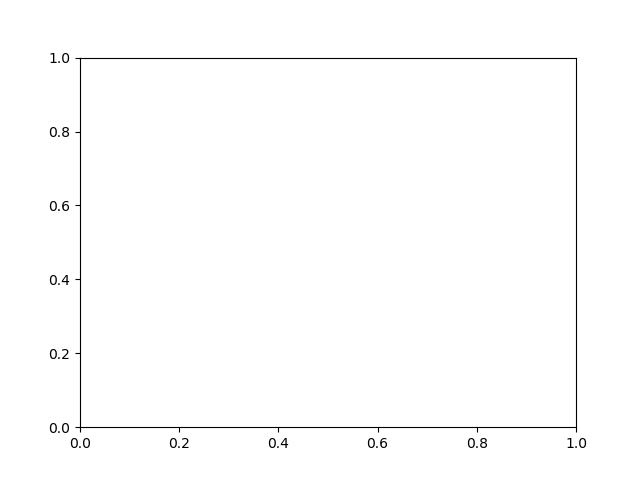

AttributeError: 'DataFrame' object has no attribute 'disease'

In [45]:
##################################################################################################################
#
# YouDo: 
#  Make a visualization showing week vs cum_2017 for all of the top 5 diseases
#  
# Strive to make it publication quality. At a minimum, it should have
#   1) Meaningful axis labels with units as appropriate
#   2) An appropriate title
#   2) Legible axis "tick labels"
#   4) A legend that doesn't interfere with
#      the plot
#######################################  BEGIN STUDENT CODE  #####################################################
%matplotlib notebook
fig, ax  = plt.subplots()

for diz in df.iloc[:5,:].Disease: #top 5 diseases
    df_diz = df2[[xx.startswith(diz.strip()) for xx in df2.disease]]
    df_diz.sort_values('cum_2017')
    ax.plot([float(xx) for xx in df_diz.mmwr_week], [float(xx) for xx in df_diz.cum_2017], label=diz)
    
plt.legend()
plt.xlabel('Week Number')
plt.ylabel('Cumulative Reports of Disease')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
#######################################   END STUDENT CODE   #####################################################


In [ ]:
#NOTE: for some reason, I couldn't get xmltodict to import.  So it sort of messed up the rest of the coding.  What could I be doing differently?
#Stackedoverflow had recommended to The issue can be resolved trough this simple way: use 'pip' - python package manager $ sudo pip install xmltodict
#This should install missing module and you shouldn't have problems with this module.